In [ ]:
import os
from os.path import isfile, isdir, join
import time
import cv2
import numpy as np
from PIL import Image,ImageDraw
import math

frame_count = 0
cap = cv2.VideoCapture("C:\\Users\\xalanaseon\\Documents\\Experiment\\zhicnepasr.mp4")
while(cap.isOpened()):
# if no frame then break
    ret, frame = cap.read()
    print(ret)
    if not ret:
        break
    frame_count = frame_count + 1
    filename = 'C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame' + '_00' +format(str(frame_count), '0>3s') + '.jpg'
    cv2.imwrite(filename, frame)
cap.release()

In [ ]:
from PIL import Image

def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import image_slicer

figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')

#img = cv.imread('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00097.jpg',0)

image_slicer.slice('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00096.jpg', 32)
image_slicer.slice('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00098.jpg', 32)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

src = np.array(Image.open('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00096_01_03.png'))
mask = np.array(Image.open('C:\\Users\\xalanaseon\\Pictures\\mask.jpg').resize(src.shape[1::-1], Image.BILINEAR))
mask = mask / 255
dst = src * mask
Image.fromarray(dst.astype(np.uint8)).save('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00096_01_03_mask.jpg')

img = cv.imread('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00096_01_03_mask.jpg',0)



dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Tampered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
cv.imwrite('C:\\Users\\xalanaseon\\Pictures\\Frame_00096_01_02_mask.jpg',magnitude_spectrum)
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

src = np.array(Image.open('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00098_01_03.png'))
mask = np.array(Image.open('C:\\Users\\xalanaseon\\Pictures\\mask.jpg').resize(src.shape[1::-1], Image.BILINEAR))
mask = mask / 255
dst = src * mask
Image.fromarray(dst.astype(np.uint8)).save('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00098_01_03_mask.jpg')

img = cv.imread('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00098_01_03_mask.jpg',0)
variance = cv2.Laplacian(img, cv2.CV_64F).var()
print(variance)


dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Tampered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
cv.imwrite('C:\\Users\\xalanaseon\\Pictures\\Frame_00098_01_02_mask.jpg',magnitude_spectrum)
plt.show()

<class 'numpy.ndarray'>
214.22671854624807


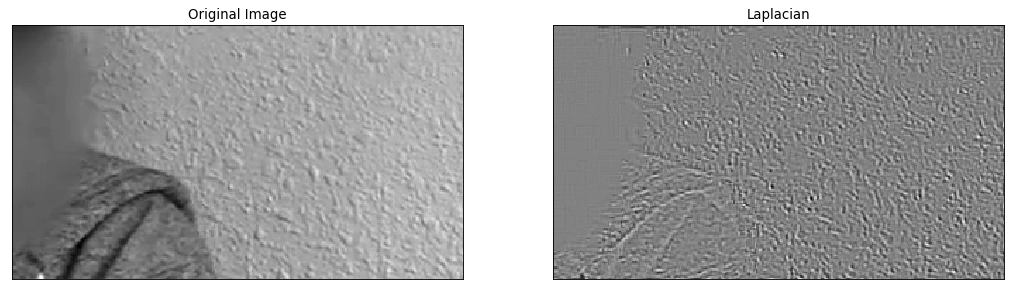

In [63]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

#ddepth = cv2.CV_16S
ddepth = cv2.CV_64F
kernel_size = 3
# Create Window

img = cv2.imread('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00096_01_04.png',0)
print(type(img))
dst = cv2.Laplacian(img, ddepth, ksize=kernel_size)
variance = cv2.Laplacian(img, cv2.CV_64F).var()
print(variance)
dft = cv2.dft(np.float32(dst),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')

img = cv.imread('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00097_01_02.png',0)
print(type(img))
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import image_slicer
from PIL import ImageDraw, ImageFont
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

tiles = image_slicer.slice('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00101.jpg', 16, save=False)

for tile in tiles:
    figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
    overlay = ImageDraw.Draw(tile.image)
    imcv = cv.cvtColor(np.asarray(tile.image), cv.COLOR_RGB2GRAY)
    print(imcv.shape)
    dft = cv.dft(np.float32(imcv),flags = cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    #pdft = np.fft.fft2(imcv)
    #pdft_shift = np.fft.fftshift(pdft)
    #phase_spectrum = np.angle(pdft_shift)
    
    plt.subplot(121),plt.imshow(imcv, cmap = 'gray')
    plt.title('Source Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    #plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
    #plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

#image_slicer.save_tiles(tiles)

In [ ]:
import image_slicer
from PIL import ImageDraw, ImageFont
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

tiles = image_slicer.slice('C:\\Users\\xalanaseon\\Documents\\Experiment\\Frame_00101.jpg', 16, save=False)

for tile in tiles:
    figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
    overlay = ImageDraw.Draw(tile.image)
    imcv = cv.cvtColor(np.asarray(tile.image), cv.COLOR_RGB2GRAY)
    print(type(imcv))
    edges = cv.Canny(imcv,0,35)
    plt.subplot(121),plt.imshow(imcv,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

#image_slicer.save_tiles(tiles)

<class 'numpy.ndarray'>
105.01351727157373


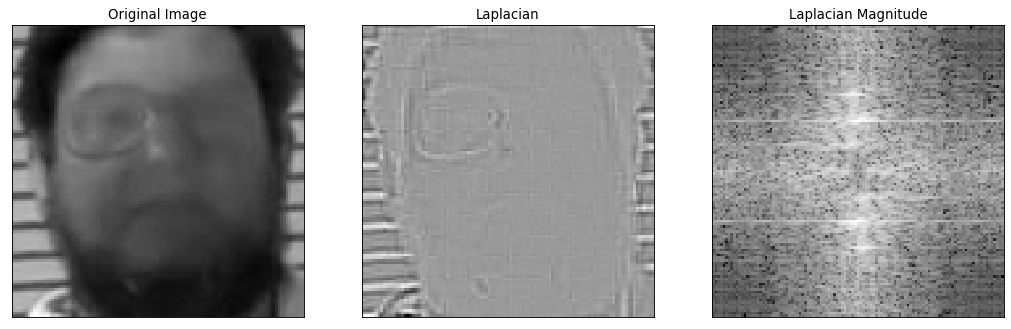

In [65]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

#ddepth = cv2.CV_16S
ddepth = cv2.CV_16S
kernel_size = 3
# Create Window

img = cv2.imread('E:\\fake\\face0000002.jpg',0)
print(type(img))
dst = cv2.Laplacian(img, ddepth, ksize=kernel_size)

variance = cv2.Laplacian(img, cv2.CV_64F).var()
print(variance)

dft = cv2.dft(np.float32(dst),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Laplacian Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

<class 'numpy.ndarray'>
30.868876729495845


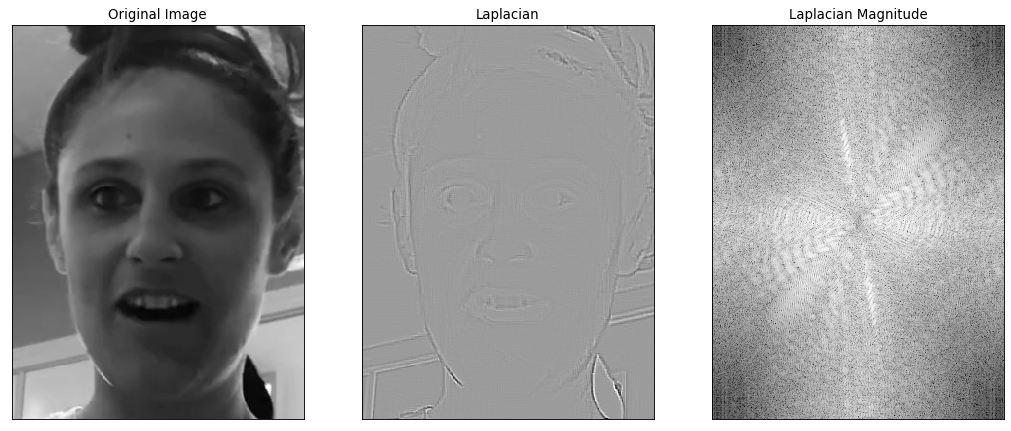

In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

#ddepth = cv2.CV_16S
ddepth = cv2.CV_16S
kernel_size = 3
# Create Window

img = cv2.imread('E:\\Train_dataset\\dfdc_train_part_00_faces\\uikpmbsozb\\face_00001f1.jpg',0)
print(type(img))
dst = cv2.Laplacian(img, ddepth, ksize=kernel_size)
variance = cv2.Laplacian(img, cv2.CV_64F).var()
print(variance)

dft = cv2.dft(np.float32(dst),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Laplacian Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

<class 'numpy.ndarray'>
66.10578994736858


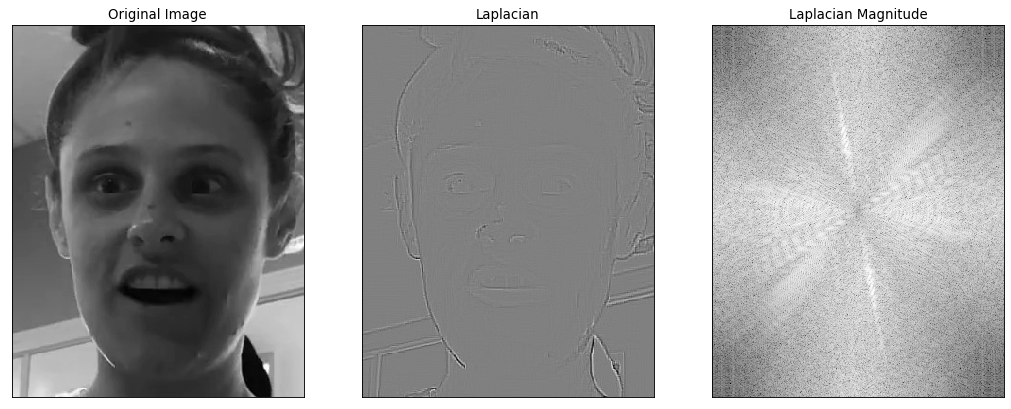

In [46]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
from PIL import Image

#ddepth = cv2.CV_16S
ddepth = cv2.CV_16S
kernel_size = 3
# Create Window

img = cv2.imread('E:\\Train_dataset\\dfdc_train_part_00_faces\\xugmhbetrw\\face_00001f1.jpg',0)
print(type(img))
dst = cv2.Laplacian(img, ddepth, ksize=kernel_size)
variance = cv2.Laplacian(img, cv2.CV_64F).var()
print(variance)

dft = cv2.dft(np.float32(dst),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Laplacian Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()